In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import scipy
import sympy

import Constants
import Topology as tp

In [2]:
N = Constants.N
K_mat = Constants.K_MAT
A_mat = Constants.A_MAT
B_mat = Constants.B_MAT

L_adj_mat = tp.L_adj_mat
D_mat = tp.D_mat
H_adj_mat = tp.H_adj_mat
eig = tp.eig

# Draw

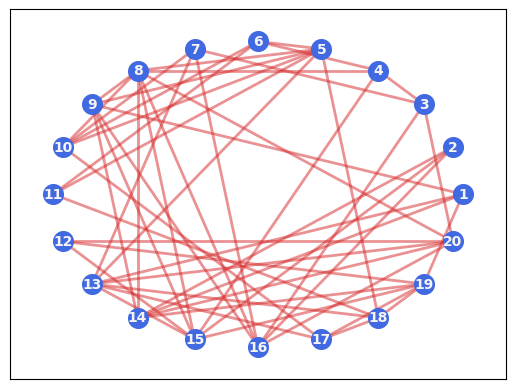

In [3]:
sub_G = tp.sub_G
pos = nx.circular_layout(sub_G)
nx.draw_networkx_nodes(sub_G, pos, node_size=200, node_color='#4169E1')
nx.draw_networkx_edges(sub_G, pos, width=2,
                       alpha=0.5,
                       edge_color="tab:red", )
nx.draw_networkx_labels(sub_G, pos, font_size=10, font_weight='heavy', font_color="whitesmoke")
plt.show()

In [4]:
x0_init = np.array([1.0, 2.0, 3.0]).T

x1_init = np.array([3.9, 6.2, 1.6]).T
x2_init = np.array([2.4, 7.1, 3.3]).T
x3_init = np.array([4.9, 4.2, 1.0]).T
x4_init = np.array([0.0, 3.6, 0.0]).T
x5_init = np.array([0.1, 2.7, 1.5]).T

x6_init = np.array([0.3, 3.9, 2.7]).T
x7_init = np.array([2.1, 3.3, 1.5]).T
x8_init = np.array([2.6, 3.6, 2.0]).T
x9_init = np.array([0.5, 5.8, 0.9]).T

x10_init = np.array([0.6, 2.9, 1.6]).T
x11_init = np.array([1.2, 2.1, 2.0]).T
x12_init = np.array([1.9, 2.5, 1.5]).T
x13_init = np.array([3.2, 2.3, 1.5]).T
x14_init = np.array([3.1, 7.3, 3.6]).T
x15_init = np.array([0.4, 5.9, 3.3]).T

x16_init = np.array([1.4, 4.3, 0.8]).T
x17_init = np.array([3.5, 2.8, 2.3]).T
x18_init = np.array([4.8, 5.7, 3.2]).T
x19_init = np.array([2.6, 0.6, 3.1]).T
x20_init = np.array([4.4, 6.7, 0.9]).T

In [5]:
x0 = np.array(x0_init)
xi = np.array([
    [x1_init],
    [x2_init],
    [x3_init],
    [x4_init],
    [x5_init],
    [x6_init],
    [x7_init],
    [x8_init],
    [x9_init],
    [x10_init],
    [x11_init],
    [x12_init],
    [x13_init],
    [x14_init],
    [x15_init],
    [x16_init],
    [x17_init],
    [x18_init],
    [x19_init],
    [x20_init]
])
xi

array([[[3.9, 6.2, 1.6]],

       [[2.4, 7.1, 3.3]],

       [[4.9, 4.2, 1. ]],

       [[0. , 3.6, 0. ]],

       [[0.1, 2.7, 1.5]],

       [[0.3, 3.9, 2.7]],

       [[2.1, 3.3, 1.5]],

       [[2.6, 3.6, 2. ]],

       [[0.5, 5.8, 0.9]],

       [[0.6, 2.9, 1.6]],

       [[1.2, 2.1, 2. ]],

       [[1.9, 2.5, 1.5]],

       [[3.2, 2.3, 1.5]],

       [[3.1, 7.3, 3.6]],

       [[0.4, 5.9, 3.3]],

       [[1.4, 4.3, 0.8]],

       [[3.5, 2.8, 2.3]],

       [[4.8, 5.7, 3.2]],

       [[2.6, 0.6, 3.1]],

       [[4.4, 6.7, 0.9]]])

In [6]:
delta = xi - x0_init
print(np.shape(delta))
delta

(20, 1, 3)


array([[[ 2.9,  4.2, -1.4]],

       [[ 1.4,  5.1,  0.3]],

       [[ 3.9,  2.2, -2. ]],

       [[-1. ,  1.6, -3. ]],

       [[-0.9,  0.7, -1.5]],

       [[-0.7,  1.9, -0.3]],

       [[ 1.1,  1.3, -1.5]],

       [[ 1.6,  1.6, -1. ]],

       [[-0.5,  3.8, -2.1]],

       [[-0.4,  0.9, -1.4]],

       [[ 0.2,  0.1, -1. ]],

       [[ 0.9,  0.5, -1.5]],

       [[ 2.2,  0.3, -1.5]],

       [[ 2.1,  5.3,  0.6]],

       [[-0.6,  3.9,  0.3]],

       [[ 0.4,  2.3, -2.2]],

       [[ 2.5,  0.8, -0.7]],

       [[ 3.8,  3.7,  0.2]],

       [[ 1.6, -1.4,  0.1]],

       [[ 3.4,  4.7, -2.1]]])

In [7]:
d_x0_init = np.matmul(A_mat, x0_init)
d_x0_init

array([-0.8697,  0.4963, -1.7482])

# $q_i(t) = -h_{ij} * δ_i(t)$
# $q = H*\delta$

In [8]:
# q1 = - sigma h1j * (x1 - x0)
q1 = np.array(
    np.sum([H_adj_mat[0][i] * delta[0][0] for i in range(N)], axis=0)
)

q1

array([-8.88178420e-16,  1.77635684e-15,  4.44089210e-16])

In [9]:
print(np.shape(K_mat))
u1 = np.matmul(K_mat, q1)
u1


(3, 3)


array([-1.70223835e-15,  3.55435681e-15,  4.57101024e-16])

In [10]:
dx = np.array([
    [np.matmul(A_mat, x0_init)],

    [np.matmul(A_mat, x1_init)],
    [np.matmul(A_mat, x2_init)],
    [np.matmul(A_mat, x3_init)],
    [np.matmul(A_mat, x4_init)],
    [np.matmul(A_mat, x5_init)],

    [np.matmul(A_mat, x6_init)],
    [np.matmul(A_mat, x7_init)],
    [np.matmul(A_mat, x8_init)],
    [np.matmul(A_mat, x9_init)],
    [np.matmul(A_mat, x10_init)],

    [np.matmul(A_mat, x11_init)],
    [np.matmul(A_mat, x12_init)],
    [np.matmul(A_mat, x13_init)],
    [np.matmul(A_mat, x14_init)],
    [np.matmul(A_mat, x15_init)],

    [np.matmul(A_mat, x16_init)],
    [np.matmul(A_mat, x17_init)],
    [np.matmul(A_mat, x18_init)],
    [np.matmul(A_mat, x19_init)],
    [np.matmul(A_mat, x20_init)]
])
dx

array([[[-0.8697 ,  0.4963 , -1.7482 ]],

       [[-3.37519,  0.10138, -4.3533 ]],

       [[-2.84795,  0.7942 , -5.10846]],

       [[-3.33729, -0.42204, -3.03142]],

       [[-0.94644,  0.38412, -2.3004 ]],

       [[-0.69622,  0.51402, -1.94368]],

       [[-1.05648,  0.79746, -2.8902 ]],

       [[-1.78176,  0.15564, -2.41068]],

       [[-2.07258,  0.1644 , -2.69468]],

       [[-1.72077,  0.66149, -3.85562]],

       [[-0.97675,  0.44623, -2.10666]],

       [[-1.02877,  0.30003, -1.67766]],

       [[-1.47866,  0.11252, -1.89112]],

       [[-2.02915, -0.18338, -1.81766]],

       [[-3.21326,  0.71711, -5.30836]],

       [[-1.60467,  1.08856, -4.25806]],

       [[-1.74793,  0.29489, -2.92046]],

       [[-2.26777, -0.06163, -2.26394]],

       [[-3.59725,  0.12147, -4.2999 ]],

       [[-1.23988,  0.02547, -0.93476]],

       [[-3.76659, -0.06616, -4.59374]]])

In [11]:
x1_init = np.array([[3.9, 6.2, 1.6]])
x1_init

array([[3.9, 6.2, 1.6]])

In [12]:

q1_init = np.array([-np.sum([H_adj_mat[0][i] * delta[0][0] for i in range(N)], axis=0)])
q1_init

array([[ 8.88178420e-16, -1.77635684e-15, -4.44089210e-16]])

In [13]:
print(K_mat.shape, q1_init.shape)
u1_init = np.array(np.matmul(K_mat, q1_init.T)).T
u1_init

(3, 3) (1, 3)


array([[ 1.70223835e-15, -3.55435681e-15, -4.57101024e-16]])

In [14]:
d_x1_init = np.array(np.matmul(A_mat, x1_init.T) + np.matmul(B_mat, u1_init.T)).T
d_x1_init

array([[-3.37519,  0.10138, -4.3533 ]])

In [15]:
delta1_init = x1_init - x0_init
delta1_init

array([[ 2.9,  4.2, -1.4]])

In [16]:
x1 = np.array(x1_init)
q1 = np.array(q1_init)
u1 = np.array(u1_init)
d_x1 = np.array(d_x1_init)
delta1 = np.array(delta1_init)
d_x1

array([[-3.37519,  0.10138, -4.3533 ]])

In [17]:
T_TOTAL = 10
T_TOTAL_SLICE_NUM = 200
T_SLICE = T_TOTAL / T_TOTAL_SLICE_NUM
SLICES = np.linspace(0, T_TOTAL, T_TOTAL_SLICE_NUM)
SLICES

array([ 0.        ,  0.05025126,  0.10050251,  0.15075377,  0.20100503,
        0.25125628,  0.30150754,  0.35175879,  0.40201005,  0.45226131,
        0.50251256,  0.55276382,  0.60301508,  0.65326633,  0.70351759,
        0.75376884,  0.8040201 ,  0.85427136,  0.90452261,  0.95477387,
        1.00502513,  1.05527638,  1.10552764,  1.15577889,  1.20603015,
        1.25628141,  1.30653266,  1.35678392,  1.40703518,  1.45728643,
        1.50753769,  1.55778894,  1.6080402 ,  1.65829146,  1.70854271,
        1.75879397,  1.80904523,  1.85929648,  1.90954774,  1.95979899,
        2.01005025,  2.06030151,  2.11055276,  2.16080402,  2.21105528,
        2.26130653,  2.31155779,  2.36180905,  2.4120603 ,  2.46231156,
        2.51256281,  2.56281407,  2.61306533,  2.66331658,  2.71356784,
        2.7638191 ,  2.81407035,  2.86432161,  2.91457286,  2.96482412,
        3.01507538,  3.06532663,  3.11557789,  3.16582915,  3.2160804 ,
        3.26633166,  3.31658291,  3.36683417,  3.41708543,  3.46

In [18]:
for i in range(1, T_TOTAL_SLICE_NUM):
    x1_new = np.array([d_x1[i - 1, :] * T_SLICE + x1[i - 1, :]])
    delta1_new = np.array(x1_new - x0_init)

    print([H_adj_mat[0][j] * delta1_new for j in range(N)])
    q1_new = np.array(-np.sum([H_adj_mat[0][j] * delta1_new for j in range(N)], axis=0))
    u1_new = np.array(np.matmul(K_mat, q1_new.T)).T
    d_x1_new = np.array([np.matmul(A_mat, x1[i - 1, :].T) + np.matmul(B_mat, x1[i - 1, :].T)])
    #print("d_x1:", d_x1_new)

    print(delta1_new)
    x1 = np.append(x1, x1_new, axis=0)
    d_x1 = np.append(d_x1, d_x1_new, axis=0)
    q1 = np.append(q1, q1_new, axis=0)
    u1 = np.append(u1, u1_new, axis=0)
    delta1 = np.append(delta1, delta1_new, axis=0)

x1

[array([[10.924962, 16.820276, -6.47066 ]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0., -0.]]), array([[-2.7312405, -4.205069 ,  1.617665 ]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0., -0.]]), array([[-2.7312405, -4.205069 ,  1.617665 ]]), array([[-2.7312405, -4.205069 ,  1.617665 ]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0., -0.]]), array([[-2.7312405, -4.205069 ,  1.617665 ]]), array([[ 0.,  0., -0.]])]
[[ 2.7312405  4.205069  -1.617665 ]]
[array([[11.029924, 18.080552, -7.02132 ]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0., -0.]]), array([[-2.757481, -4.520138,  1.75533 ]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0., -0.]]), array([[ 0.,  0.,

array([[ 3.90000000e+00,  6.20000000e+00,  1.60000000e+00],
       [ 3.73124050e+00,  6.20506900e+00,  1.38233500e+00],
       [ 3.75748100e+00,  6.52013800e+00,  1.24467000e+00],
       [ 3.77869594e+00,  6.83547712e+00,  1.09786663e+00],
       [ 3.79619734e+00,  7.16683982e+00,  9.35041643e-01],
       [ 3.80982867e+00,  7.51421885e+00,  7.55805238e-01],
       [ 3.81924772e+00,  7.87840815e+00,  5.58966538e-01],
       [ 3.82410738e+00,  8.26019972e+00,  3.43318517e-01],
       [ 3.82403857e+00,  8.66042326e+00,  1.07578454e-01],
       [ 3.81865008e+00,  9.07994607e+00, -1.49612679e-01],
       [ 3.80752733e+00,  9.51967465e+00, -4.29694631e-01],
       [ 3.79023113e+00,  9.98055646e+00, -7.34192286e-01],
       [ 3.76629639e+00,  1.04635816e+01, -1.06472033e+00],
       [ 3.73523073e+00,  1.09697848e+01, -1.42298818e+00],
       [ 3.69651309e+00,  1.15002470e+01, -1.81080508e+00],
       [ 3.64959215e+00,  1.20560977e+01, -2.23008562e+00],
       [ 3.59388482e+00,  1.26385168e+01

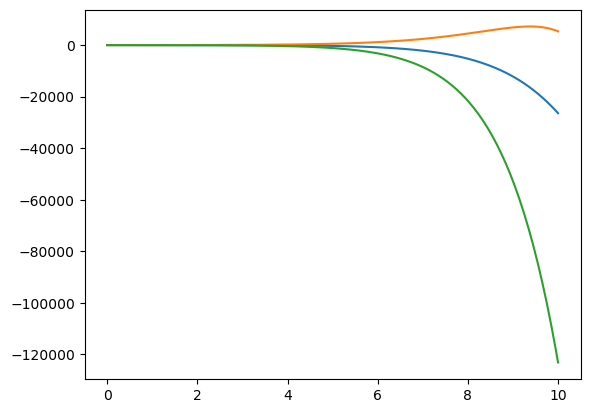

In [19]:
plt.plot(SLICES, x1)